## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler

import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set
import target_parser

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from target_parser.ipynb


In [3]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

Proportion of failures in Undersampled dataset to max size 300 000:

Status			 Percentage	 Amount
Other:			 56.269%	 300000
Status_9_Substatus_8: 	 42.890 %	 228668
Status_62_Substatus_7:	 0.769%		 4098
Status_62_Substatus_30:	 0.072%		 383



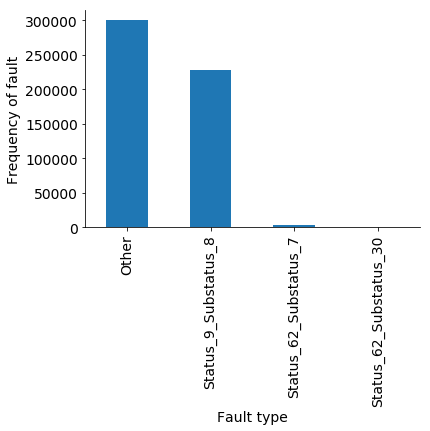

<Figure size 1440x1152 with 0 Axes>

In [4]:
data_sampling.get_statues_percentage(undersampled_data, 'Undersampled dataset to max size 300 000:\n')
data_sampling.plot_balance(undersampled_data, 'Status')

## Do more undersampling

In [5]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

Proportion of failures in Undersampled dataset to max size 20 000:

Status			 Percentage	 Amount
Other:			 44.963%	 20000
Status_9_Substatus_8: 	 44.963 %	 20000
Status_62_Substatus_7:	 9.213%		 4098
Status_62_Substatus_30:	 0.861%		 383



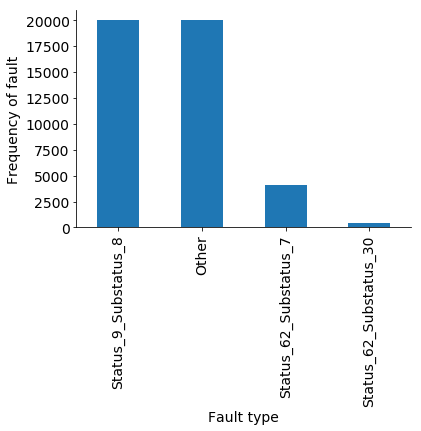

<Figure size 1440x1152 with 0 Axes>

In [6]:
data_sampling.get_statues_percentage(undersampled_data, 'Undersampled dataset to max size 20 000:\n')
data_sampling.plot_balance(undersampled_data, 'Status')

In [7]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data[['Status']]
X.shape

(44481, 34)

In [8]:
y

,Status
0,Status_9_Substatus_8
1,Status_9_Substatus_8
2,Status_9_Substatus_8
3,Status_9_Substatus_8
4,Status_9_Substatus_8
5,Status_9_Substatus_8
6,Status_9_Substatus_8
7,Status_62_Substatus_7
8,Status_9_Substatus_8
9,Status_9_Substatus_8


### Translate status codes to int for easier comparison


In [9]:
target_parser.status_to_code(y)
y

target_parser.ipynb:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "source": [


,Status
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,2
8,1
9,1


### Split into training and test

In [10]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [11]:
y_train.Status.value_counts()

1    13400
0    13400
2     2746
3      256
Name: Status, dtype: int64

## Random forest and feature importance


random_forest_method.ipynb:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  "cell_type": "markdown",


Normalized confusion matrix
[[9.86363636e-01 9.39393939e-03 3.93939394e-03 3.03030303e-04]
 [1.27272727e-02 9.87272727e-01 0.00000000e+00 0.00000000e+00]
 [2.21893491e-03 0.00000000e+00 9.97781065e-01 0.00000000e+00]
 [9.44881890e-02 2.36220472e-02 0.00000000e+00 8.81889764e-01]]


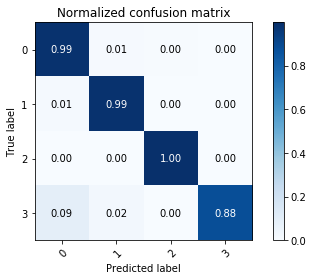

Total Accuracy 		0.987

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.985 		 0.986 		 0.986
1                         	 0.990 		 0.987 		 0.989
2                         	 0.981 		 0.998 		 0.989
3                         	 0.982 		 0.882 		 0.929


In [12]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [13]:
rf

,importance
ActivePower,0.145105
Log-T-Raw-Rectifier1HeatSink,0.101154
Log-T-Raw-TransformerTemperature,0.075970
Log-T-Raw-Rotor2Temperature,0.055858
Log-T-Raw-Rotor1Temperature,0.048504
Log-T-Raw-Stator1Temperature,0.041432
Log-T-Raw-Stator2Temperature,0.041259
Log-T-Raw-RearBearingTemperature,0.035060
Log-T-Raw-NacelleAmbientTemperature,0.034572
Log-T-Raw-Rectifier2HeatSink,0.032558


# Preprocessing

### Feature Extraction (based on lowest feature importance from RF)

In [14]:
print('X_train', X_train.shape)
print('X_test ', X_test.shape)

dropColumns = ['Log-T-Raw-BladeATemperature', 'Log-T-Raw-BladeBTemperature', 'Log-T-Raw-BladeCTemperature',
               'Log-T-Raw-BladeAPitchControlBox', 'Log-T-Raw-BladeBPitchControlBox', 'Log-T-Raw-BladeCPitchControlBox',
               'Log-T-Raw-BladeAPitchHeatSink', 'Log-T-Raw-BladeBPitchHeatSink', 'Log-T-Raw-BladeCPitchHeatSink',
               'Log-T-Raw-RectifierCabinetTemperature', 'Log-T-Raw-NacelleControlCabinetTemperature',
               'WindVane', 'WindDirection', 'WindSpeed','Nacelle-Temperature', 'Spinner-Temperature']

X_train = X_train.drop(columns=dropColumns)
X_test = X_test.drop(columns=dropColumns)

print('X_train', X_train.shape)
print('X_test ', X_test.shape)

X_train (29802, 34)
X_test  (14679, 34)
X_train (29802, 18)
X_test  (14679, 18)


In [15]:
print(X_train.shape)

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)

(29802, 18)
(29802, 18)


In [17]:
X

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,7.500000,2.300000,0.530000,231.0,0.0,9.0,20.0,17.0,16.0,15.0,...,29.0,30.0,25.0,14.0,3.0,8.0,13.0,29.0,60.049999,238.500000
1,-3.800000,5.300000,12.030000,123.0,0.0,23.0,30.0,28.0,30.0,29.0,...,75.0,73.0,46.0,45.0,26.0,29.0,34.0,42.0,10.720000,119.199997
2,-0.500000,7.200000,15.230000,232.0,517.0,20.0,32.0,32.0,26.0,27.0,...,59.0,45.0,40.0,49.0,11.0,21.0,24.0,40.0,1.000000,231.500000
3,3.100000,4.600000,12.050000,131.0,0.0,14.0,20.0,22.0,13.0,13.0,...,70.0,69.0,30.0,36.0,0.0,5.0,11.0,24.0,1.610000,134.100006
4,2.500000,19.500000,11.130000,220.0,0.0,13.0,33.0,19.0,24.0,24.0,...,68.0,64.0,28.0,44.0,9.0,15.0,20.0,26.0,40.419998,222.500000
5,-3.100000,2.400000,6.780000,20.0,0.0,25.0,33.0,32.0,27.0,29.0,...,63.0,63.0,40.0,39.0,17.0,22.0,28.0,42.0,1.000000,16.900000
6,-4.200000,13.000000,19.670000,222.0,2216.0,23.0,33.0,31.0,22.0,25.0,...,54.0,46.0,27.0,33.0,12.0,21.0,26.0,48.0,3.910000,217.800003
7,-9.400001,16.300001,14.080000,90.0,243.0,21.0,29.0,28.0,9.0,12.0,...,1.0,0.0,6.0,13.0,0.0,16.0,18.0,51.0,4.860000,80.599998
8,-0.900000,5.700000,11.960000,146.0,0.0,10.0,20.0,22.0,10.0,10.0,...,73.0,73.0,27.0,36.0,-5.0,1.0,24.0,15.0,11.630000,145.100006
9,36.500000,0.100000,0.110000,345.0,0.0,16.0,18.0,15.0,22.0,22.0,...,16.0,16.0,29.0,15.0,23.0,23.0,29.0,32.0,60.070000,-21.500000


In [18]:
correct_columns = list(filter(lambda x: (x not in dropColumns), list(X)))

X_train = pd.DataFrame(X_train_scaled, columns=correct_columns)
X_train.head(10)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=correct_columns)
X_test_scaled.head(10)

,RotorSpeed,NacelleDirection,ActivePower,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-Rotor1Temperature,Log-T-Raw-Rotor2Temperature,Log-T-Raw-Stator2Temperature,Log-T-Raw-Stator1Temperature,Log-T-Raw-NacelleAmbientTemperature,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C
0,0.005076,0.986072,0.000000,0.627907,0.337662,0.198113,0.194313,0.350000,0.347518,0.62,0.548387,0.595238,0.297872,0.647059,0.542169,0.454545,0.333333,0.636413
1,0.801184,0.345404,0.465833,0.674419,0.324675,0.250000,0.246445,0.578571,0.560284,0.26,0.688172,0.619048,0.510638,0.352941,0.578313,0.509091,0.647059,0.000000
2,0.045685,0.050139,0.000000,0.569767,0.305195,0.150943,0.151659,0.228571,0.226950,0.48,0.279570,0.309524,0.212766,0.509804,0.542169,0.436364,0.323529,0.636844
3,0.685279,0.632312,0.263333,0.604651,0.331169,0.188679,0.184834,0.342857,0.326241,0.32,0.698925,0.666667,0.393617,0.352941,0.469880,0.327273,0.333333,0.000000
4,0.180626,0.303621,0.000000,0.883721,0.376623,0.481132,0.554502,0.828571,0.836879,0.48,0.365591,0.428571,0.297872,0.588235,0.710843,0.690909,0.735294,0.172901
5,0.258037,0.342618,0.000000,0.476744,0.266234,0.132075,0.123223,0.200000,0.198582,0.18,0.236559,0.238095,0.180851,0.156863,0.313253,0.345455,0.215686,0.000000
6,0.848139,0.345404,0.793333,0.744186,0.292208,0.410377,0.436019,0.900000,0.921986,0.30,0.645161,0.678571,0.255319,0.333333,0.674699,0.600000,0.735294,0.009378
7,0.785110,0.334262,0.369583,0.779070,0.409091,0.311321,0.308057,0.564286,0.560284,0.54,0.666667,0.488095,0.521277,0.509804,0.590361,0.527273,0.480392,0.000000
8,0.549069,0.520891,0.123333,0.686047,0.389610,0.268868,0.270142,0.442857,0.432624,0.46,0.623656,0.500000,0.521277,0.490196,0.530120,0.436364,0.372549,0.000000
9,0.004230,0.105850,0.000000,0.639535,0.337662,0.169811,0.165877,0.257143,0.255319,0.56,0.387097,0.416667,0.244681,0.568627,0.590361,0.545455,0.401961,0.980705


Loading...
Training...


/Users/mortenolsenosvik/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[9.30454545e-01 5.57575758e-02 1.37878788e-02 0.00000000e+00]
 [3.84848485e-01 6.14696970e-01 4.54545455e-04 0.00000000e+00]
 [3.90532544e-01 4.65976331e-02 5.62869822e-01 0.00000000e+00]
 [9.44881890e-01 4.72440945e-02 7.87401575e-03 0.00000000e+00]]


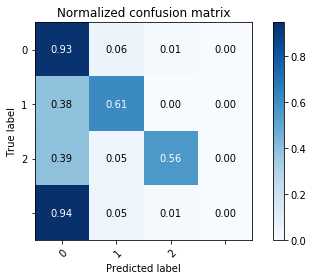

Plotting Performance Measure...
Total Accuracy 		0.747

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.658 		 0.930 		 0.771
1                         	 0.903 		 0.615 		 0.731
2                         	 0.889 		 0.563 		 0.689


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)